<img src="http://sonetodigital.com.br/adm/wp-content/uploads/2018/12/logo-fiap.png" width="150" align="left"/>

<br/><br/>

<font size=5 color="#ed145b"><b> Inteligência Artificial e Machine Learning </b></font>

## Modelo de Aprendizado Supervisionado

Fomos desafiados a criar um modelo de aprendizado supervisionado. Mas, afinal, o que é esse tal modelo?

O <b>Aprendizado supervisionado</b> acontece quando os dados utilizados para treinar o algoritmo incluem a solução desejada. Incluem o rótulo, a resposta certa. Diferente do <i>aprendizado não supervisionado</i>, em que o algoritmo não tem esse rótulo. Neste caso ele aprende sem a resposta certa.

Existe ainda o <i>aprendizado semi-supervisionado</i>, que tem a presença de alguns dados com rótulo e outros sem. E o <i>aprendizado por reforço</i>, em que o algoritmo interage com um ambiente dinâmico com feedbacks em termos de premiações e punições.

Mas o nosso foco aqui é o aprendizado supervisionado para predição. Para predizer uma resposta certa.

### Modelos Preditivos

Existem dois grandes grupos de modelos preditivos: a classificação e a regressão.

<b>Classificação</b> é quando a variável a ser predita é qualitativa. Ela separa classes. Busca um <i>conjunto de características</i> que formam determinada classe.

<b>Regressão</b> é quando a variável a ser predita é quantitativa. Ela busca um valor específico. Um dado numérico específico.

Para fazer essa NAC, nós optamos pelo modelo de <i>classificação</i>.

Agora que entendemos o que é modelo de aprendizado supervisionado e modelos preditivos, vamos para a BASE DE DADOS.


### Adult dataset

O dataset que escolhemos foi o Adult, cuja finalidade é prever se a renda anual de uma pessoa é menor-igual ou maior do que US $50.000.

As previsões são feitas com base em informações pessoais, como:

- Idade
- Grau de Escolaridade.
- Estado Civil.
- Ocupação Profissional.
- Etnia.
- Sexo.
- País de Origem.
- etc.

### Importando as bibliotecas

Vamos começar importando as bibliotecas necessárias e acessando a nossa base de dados.

Obs: para esse conjunto de dados, nós tivemos que utilizar bibliotecas que não vimos em aula.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, spearmanr
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.preprocessing as preprocessing
import category_encoders as ce

pd.set_option("display.precision", 3)
pd.set_option("display.max_columns",300)

df = pd.read_csv("../data/adult.csv", index_col=0)

### Explorando o dataset

Ao chamar a variável python df, podemos visualizar o nosso dataset. Vamos fazer isso usando o head, para vermos apenas os primeiros valores da base de dados.

In [2]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


A coluna <i>income</i> (a última da tabela) retorna a classe de cada indivíduo. Informando se ele possui renda menor ou maior do que 50 mil.

Essa base de dados é composta por 32.561 elementos.

In [3]:
df.shape[0]

32561

Vamos dar uma olhada no <i>income</i> e ver quantas pessoas ganham menos que 50 mil e quantas ganham mais.

In [4]:
#chamando a variável income
df["income"].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

O retorno que tivemos é que 24.720 pessoas da nossa base de dados possuem renda menor-igual a 50 mil, enquanto 7.841 pessoas têm uma renda superior a 50 mil.

Se quisermos saber os valores percentuais desses números, podemos fazer assim:

In [6]:
todos = df.shape[0]
maior = df[df['income'] == ' >50K'].shape[0]
menorIgual = df[df['income'] == ' <=50K'].shape[0]

maiorPercentual = (maior/todos)*100
menorPercentual = (menorIgual/todos)*100

print("Total de pessoas: {}".format(todos))
print("Percentual de pessoas com renda maior do que 50k: {:.2f}".format(maiorPercentual))
print("Percentual de pessoas com renda menor do que 50k: {:.2f}".format(menorPercentual))

Total de pessoas: 32561
Percentual de pessoas com renda maior do que 50k: 24.08
Percentual de pessoas com renda menor do que 50k: 75.92


Dos 32.561 indivíduos, 75,92% possuem renda inferior a 50 mil, enquanto 24,08% têm renda superior a 50 mil.

### Pré-Processamento

O pré-processamento dos dados é uma etapa muito importante, pois é aqui que se dá o tratamento desejado nas variáveis antes de usá-las nos modelos. Existem várias técnicas de processamento dos dados, como:

- Seleção das variáveis
- Vazamento de dados
- Padronização
- Redução de Dimensão
- Colinearidade
- Valores Missing
- One-hot encoding

A base de dados que estamos utilizando, que baixamos do UCI, veio com alguns valores faltando. Então vamos tratar esses missings. 

In [7]:
nomeColuna = df.columns
numDados = df.shape[0]
for c in nomeColuna:
    numNon = df[c].isin([" ?"]).sum()
    if numNon > 0:
        print (c)
        print (numNon)
        print ("{0:.2f}%".format(float(numNon) / numDados * 100))

workclass
1836
5.64%
occupation
1843
5.66%
native_country
583
1.79%


In [8]:
df = df[df["workclass"] != " ?"]
df = df[df["occupation"] != " ?"]
df = df[df["native_country"] != " ?"]
df.shape

(30162, 15)

Um pré-processamento FUNDAMENTAL para esse dataset é a transformação de classes em dados numéricos. Machine Learning só reconhece números, logo os campos em formato de texto precisam ser convertidos em números.

Essa etapa de pré-processamento foi a que mais nos deu dor de cabeça, a que mais arrancou lágrimas dos nossos olhos. Essa foi uma daquelas etapas que nos fizeram questionar as escolhas que fizemos na vida (risos). Isso porque existem várias e várias formas de tratar essa questão, e nós, que estamos sendo introduzidos no assunto, ficamos perdidos em meio a TANTA informação.

Nós não conseguimos saber se, para o nosso caso, One-Hot Encoding é melhor do que Label Encoding. Fizemos o maior esforço para <b>tentar</b> ENTENDER esses conceitos. Aqui nós descobrimos que o pré-processamento pode ser considerado a principal etapa do projeto. Pois as possibilidades são MUITAS. E tudo depende da finalidade que o dataset será utilizado.

Se fizemos o maior esforço para tentar entender, imagine para tentar aplicar. . .

Encontramos uma solução com one-hot encoder. Pode não ser muito prática, pois tivemos que inserir cada valor de texto do nosso dataset, na unha. Mas funcionou...

In [12]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
X = [[' Private', ' Bachelors', ' United-States'], [' Local-gov', ' Masters', ' Canada']]
enc.fit(X)

#aqui nós passamos apenas alguns valores e tranformamos em lista
enc.transform([[' Local-gov', ' Bachelors', ' Canada'],
                [' Private', ' Masters', ' United-States']]).toarray()

array([[1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.]])

In [13]:
#e aqui passamos todos os textos da nossa base de dados, de todas as categorias

workclass = [' Federal-gov',' Local-gov',' Never-worked',' Private',' Self-emp-inc',
             ' Self-emp-not-inc',' State-gov',' Without-pay']
education = [' Assoc-acdm',' Assoc-voc',' Bachelors',' Doctorate',' HS-grad',
             ' Masters',' Preschool',' Prof-school',' Some-college']
marital_status = [' Divorced',' Married-AF-spouse',' Married-civ-spouse',
                  ' Married-spouse-absent',' Never-married',' Separated',' Widowed']
occupation = [' Adm-clerical',' Armed-Forces',' Craft-repair',' Exec-managerial',' Farming-fishing',
              ' Handlers-cleaners',' Machine-op-inspct',' Other-service',' Priv-house-serv',' Prof-specialty',
              ' Protective-serv',' Sales',' Tech-support',' Transport-moving']
relationship = [' Husband',' Not-in-family',' Other-relative',' Own-child',' Unmarried',' Wife']
race = [' Amer-Indian-Eskimo',' Asian-Pac-Islander',' Black',' Other',' White']
sex = [' Female',' Male']
native_country = [' Cambodia',' Canada',' China',' Columbia',' Cuba',' Dominican-Republic',
                  ' Ecuador',' El-Salvador',' England',' France',' Germany',' Greece',' Guatemala',' Haiti',
                  ' Holand-Netherland',' Honduras',' Hong',' Hungary',' India',' Iran',' Ireland',' Italy',
                  ' Jamaica',' Japan',' Laos',' Mexico',' Nicaragua',' Outlying-US(Guam-USVI-etc)',' Peru',
                  ' Philippines',' Poland',' Portugal',' Puerto-Rico',' Scotland',' South',' Taiwan',' Thailand',
                  ' Trinadad&Tobago',' United-States',' Vietnam',' Yugoslavia']

enc = OneHotEncoder(categories=[workclass, education, marital_status, occupation, 
                                              relationship, race,sex,native_country])
x = [[' Federal-gov',' Assoc-acdm',' Married-civ-spouse', ' Adm-clerical',' Husband',' Asian-Pac-Islander',' Male',' China'],
     [' Federal-gov',' Doctorate',' Married-civ-spouse', ' Adm-clerical',' Wife',' Black',' Female',' United-States']]

enc.fit(x)

OneHotEncoder(categories=[[' Federal-gov', ' Local-gov', ' Never-worked',
                           ' Private', ' Self-emp-inc', ' Self-emp-not-inc',
                           ' State-gov', ' Without-pay'],
                          [' Assoc-acdm', ' Assoc-voc', ' Bachelors',
                           ' Doctorate', ' HS-grad', ' Masters', ' Preschool',
                           ' Prof-school', ' Some-college'],
                          [' Divorced', ' Married-AF-spouse',
                           ' Married-civ-spouse', ' Married-spouse-absent',
                           ' Never-married', ' Separ...
                           ' Cuba', ' Dominican-Republic', ' Ecuador',
                           ' El-Salvador', ' England', ' France', ' Germany',
                           ' Greece', ' Guatemala', ' Haiti',
                           ' Holand-Netherland', ' Honduras', ' Hong',
                           ' Hungary', ' India', ' Iran', ' Ireland', ' Italy',
                         

In [14]:
#agora podemos manipular qualquer valor do nosso dataset
enc.transform([[' Federal-gov',' Doctorate',' Married-civ-spouse', 
                ' Adm-clerical',' Wife',' Black',' Female',' United-States']]).toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [15]:
#Se chamarmos o método categories_ de one-hot encoder, ele vai retornar todas as categorias que passamos
enc.categories_

[array([' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object),
 array([' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object),
 array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
        ' Unmarried', ' Wife'], dtype=object),
 array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', 

Depois de todo esse sacrifício, nós nos deparamos com soluções MUITO mais simples e práticas na internet. Como esta:

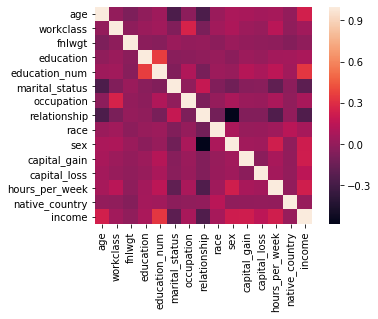

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32560,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
32561,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


In [18]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders


# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

encoded_data.tail(5)

### Treinamento do modelo de classificação

In [19]:
from sklearn.model_selection import train_test_split

#transformando o retorno em 0 quando income for <=50K e 1 quando for >50K
df['income'] = [0 if x == ' <=50K' else 1 for x in df['income']]

x = df.drop('income', 1)
y = df.income

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("O conjunto de treinamento tem {} amostras.".format(x_train.shape[0]))
print("O conjunto de testes tem {} amostras.".format(x_test.shape[0]))

O conjunto de treinamento tem 26048 amostras.
O conjunto de testes tem 6513 amostras.


### Regressão Logística

In [20]:
from sklearn.linear_model import LogisticRegression

# Treinando o modelo
model = LogisticRegression().fit(x_train, y_train)

# Fazendo as predições
y_pred = model.predict(x_test)

ValueError: could not convert string to float: ' United-States'

### Avaliação de Desempenho

In [21]:
verdadeiroPositivo = np.sum(y)
falsoPositivo = y.count() - verdadeiroPositivo
verdadeiroNegativo = 0
falsoNegativo = 0

acuracia = verdadeiroPositivo / (verdadeiroPositivo + falsoPositivo + verdadeiroNegativo + falsoNegativo)
recall = verdadeiroPositivo / (verdadeiroPositivo + falsoNegativo)
precisao = verdadeiroPositivo / (verdadeiroPositivo + falsoPositivo)


print("Predicão: [Acurácia: {:.4f}]".format(acuracia))

Predicão: [Acurácia: 0.2408]
